<a href="https://colab.research.google.com/github/liyan56/Group11_CHL5230_Datathon-6/blob/main/Feature_Anaslysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
#Upload the data file

from google.colab import files
import io
dataset = files.upload()

Saving Diabetes Study File 10K Dec 14 2017.xlsx to Diabetes Study File 10K Dec 14 2017.xlsx


In [ ]:
#Load modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Addition modules for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
#Obtain the detail of the dataset

diabete_data = pd.read_excel(io.BytesIO(dataset['Diabetes Study File 10K Dec 14 2017.xlsx']))
##Getting the shape of the dataframe
print(diabete_data.shape)
##List the columns of the dataframe
print(diabete_data.columns)
##Check for missing values in the dataset
print(diabete_data.isna().sum())
##Display the data types of each column
diabete_data.dtypes
##Display overall summary statistics
print(diabete_data.describe())
print(diabete_data['DIABETES'].value_counts())
print(diabete_data['Sex'].value_counts())


(10000, 43)
Index(['Age_at_Exam', 'sBP', 'sBP_Date', 'BMI', 'BMI_Date', 'LDL', 'LDL_Date',
       'HDL', 'HDL_Date', 'A1c', 'A1c_Date', 'TG', 'TG_Date', 'FBS',
       'FBS_Date', 'FBS>DM', 'Total_Cholesterol', 'Total_Cholesterol_Lab_Date',
       'Diabetes', 'DM_OnsetDate', 'Depression', 'Depression_OnsetDate', 'HTN',
       'HTN_OnsetDate', 'OA', 'OA_OnsetDate', 'COPD', 'COPD_Date',
       'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
       'Corticosteroids', 'Corticosteroids_first_instance', 'Sex',
       'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
       'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM', 'Patient_ID',
       'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior', 'DIABETES'],
      dtype='object')
Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL

### Data cleaning


In [ ]:
#Clean data

##Remove records with corticosteroids as it will affect suger level which can further impact the diabetes diagnosis
diabete_data_remove = diabete_data[diabete_data['Corticosteroids'].notna()]
diabete_data = diabete_data.drop(diabete_data_remove.index)

##Drop columns of data that cannot be used for analysis
##i.e. Dates, Patient_ID
diabete_data = diabete_data.drop(columns=['sBP_Date', 'BMI_Date', 'LDL_Date', 'HDL_Date', 'A1c_Date',
                                          'TG_Date', 'FBS_Date', 'Total_Cholesterol_Lab_Date', 'DM_OnsetDate',
                                          'Depression_OnsetDate', 'HTN_OnsetDate', 'OA_OnsetDate', 'COPD_Date',
                                          'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
                                          'Corticosteroids', 'Corticosteroids_first_instance', 'Patient_ID',
                                          'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior'])

##Fill missing values with zero
diabete_data['LDL'].fillna(0, inplace=True)
diabete_data['HDL'].fillna(0, inplace=True)
diabete_data['TG'].fillna(0, inplace=True)
diabete_data['Total_Cholesterol'].fillna(0, inplace=True)
diabete_data['sBP'].fillna(0, inplace=True)

##Change catogorical value to numberical value
le_gender = LabelEncoder()
diabete_data['Sex'] = le_gender.fit_transform(diabete_data['Sex']) # Male: 1, Female: 0
diabete_data['DIABETES'] = diabete_data['DIABETES'].replace({'Yes': 1, 'No': 0})

##Drop the column that will not be used for analysis
diabete_data = diabete_data.drop(columns=['leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
                                           'LeastOfAll', 'Diabetes', 'A1C_BEF_DM', 'FBS_BEF_DM'])

##Checking for missing values
print(diabete_data.describe())
print(diabete_data.isnull().sum())
diabete_data.head()

       Age_at_Exam          sBP          BMI          LDL          HDL  \
count  7145.000000  7145.000000  7145.000000  7145.000000  7145.000000   
mean     62.533100   130.335759    30.265824     2.529479     1.308731   
std      13.362675    17.232963     6.725638     0.968897     0.417871   
min      18.000000     0.000000     1.376352     0.000000     0.000000   
25%      53.000000   120.000000    25.800000     1.820000     1.030000   
50%      63.000000   130.000000    29.200000     2.400000     1.240000   
75%      72.000000   140.000000    33.600000     3.160000     1.540000   
max      90.000000   229.000000    73.400000     8.630000     3.960000   

               A1c           TG          FBS       FBS>DM  Total_Cholesterol  \
count  7145.000000  7145.000000  7145.000000  7145.000000         7145.00000   
mean      6.269080     1.529600     6.338325     0.922323            4.45336   
std       0.976932     1.014527     1.794325     0.267681            1.31194   
min       3.6

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Depression,HTN,OA,COPD,Sex,DIABETES
0,65,126.0,31.000000,1.66,1.11,5.4,2.28,5.8,1,3.81,0,0,0,0,0,0
1,62,135.0,25.846483,2.49,1.37,5.8,1.37,5.4,1,4.48,0,1,0,0,0,0
2,63,133.0,30.900000,1.65,0.00,6.1,0.76,5.6,1,0.00,0,1,0,1,1,0
3,51,136.0,56.710775,2.80,1.94,6.0,0.99,6.0,1,5.19,0,0,0,0,0,0
4,40,123.0,33.067867,2.48,1.17,5.8,1.04,5.2,1,4.12,1,0,0,0,0,0


##Data preprocessing

In [ ]:
#Preprocess data for Logistic regression

##Split the data into features and label.
y_log = diabete_data['DIABETES']
X_log = diabete_data.drop('DIABETES', axis=1)

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

##Normalizing data
scaler_log = StandardScaler()
X_log_scaled = scaler_log.fit_transform(X_log)

##Feature Selection by Recursive Feature Elimination

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_log, y_log)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=42), scoring='accuracy')

In [ ]:
features=rfecv.n_features_
mask = rfecv.get_support()
best_features = X_log.columns[mask]

print("Features: ", X_log.columns)
print("Feature ranking: ", rfecv.ranking_)
print("Selected best features: ", best_features)

Features:  Index(['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Depression', 'HTN', 'OA', 'COPD', 'Sex'],
      dtype='object')
Feature ranking:  [1 1 1 1 1 1 1 1 1 1 2 1 1 3 1]
Selected best features:  Index(['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'HTN', 'OA', 'Sex'],
      dtype='object')


###Apply selected features to logistic regression model

In [ ]:
#Preprocess data for Logistic regression

##Split the data into features and label.
y_log = diabete_data['DIABETES']
X = diabete_data[best_features]

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

##Normalizing data
scaler_log = StandardScaler()
X_log_scaled = scaler_log.fit_transform(X)

Confusion Matrix:
[[639  58]
 [ 98 634]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       697
           1       0.92      0.87      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



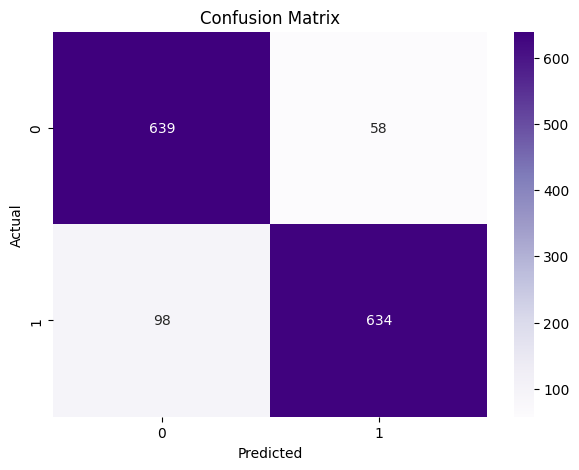

In [ ]:
#Apply logistic regression

##Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_log_train, y_log_train)

##Use the model to make predictions on the testing data
y_log_pred = log_reg.predict(X_log_test)

##Evaluate the model
conf_matrix = confusion_matrix(y_log_test, y_log_pred)
class_report = classification_report(y_log_test, y_log_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

classes = diabete_data['DIABETES'].unique()

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_log_test, y_log_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Feature selection using Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Removing both constant and quasi-constant
var_thr = VarianceThreshold(threshold = 0.25)
var_thr.fit(X_log)

# Uncomment see the result:  True: High Variance; False: Low Variance
print(var_thr.get_support())

selected_features = X_log.columns[var_thr.get_support()].tolist()

print(selected_features)

[ True  True  True  True False  True  True  True False  True False False
 False False False]
['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol']


###Apply selected features to logistic regression model

In [ ]:
#Preprocess data for Logistic regression

##Split the data into features and label.
y_log = diabete_data['DIABETES']
X = diabete_data[selected_features]

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

##Normalizing data
scaler_log = StandardScaler()
X_log_scaled = scaler_log.fit_transform(X)

Confusion Matrix:
[[622  75]
 [107 625]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       697
           1       0.89      0.85      0.87       732

    accuracy                           0.87      1429
   macro avg       0.87      0.87      0.87      1429
weighted avg       0.87      0.87      0.87      1429



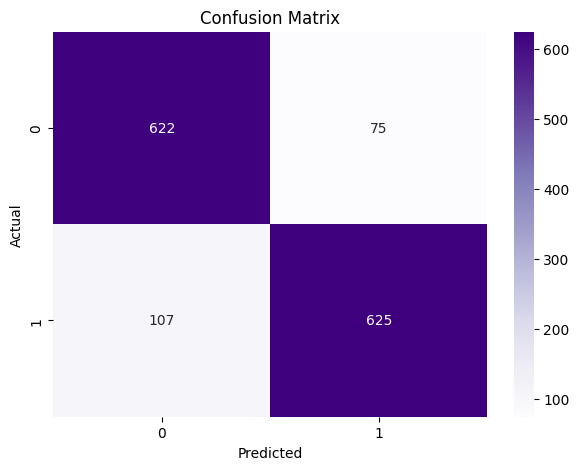

In [ ]:
#Apply logistic regression

##Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_log_train, y_log_train)

##Use the model to make predictions on the testing data
y_log_pred = log_reg.predict(X_log_test)

##Evaluate the model
conf_matrix = confusion_matrix(y_log_test, y_log_pred)
class_report = classification_report(y_log_test, y_log_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

classes = diabete_data['DIABETES'].unique()

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_log_test, y_log_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()